<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/bloc%20de%20notas/Caso_3_Frecuencias_datos_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 3. Análisis descriptivo de datos de aplicaciones de vacunas y fabricantes COVID

# Objetivo

Realizar un análisis descriptivo de frecuencias sobre los datos de aplicaciones de vacunas en distintos países  y fabricantes de las mismas de COVID.

# Descripción

Cargar los datos de COVID de la URL: (https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/country%20vaccinations%20by%20manufacturer.csv). Fuente: [kaggle.com](https://kaggle.com)

Resolver las siguientes necesidades de datos:

1. ¿Cuál país ha tenido mas aplicaciones a lo largo del tiempo?, contar  count() los registros, ¿Será USA?

2. ¿Cuál fabricante de vacunas ha tenido mas aplicaciones a lo largo del tiempo?, contar count() los registros ¿será Pfizer/BioNTech?

3. ¿Cuántas vacunas se han aplicado por país?, sumar (total_vaccinations) la cantidad de aplicaciones por país?

4. ¿Cuántas vacunas se han aplicado por fabricante?, sumar (total_vaccinations) las vacunas agrupadas por fabricante

5. ¿En que mes se ha aplicado mas vacunas?, sumar (total_vaccinations) agrupada por mes

Visualizar diagramas de barra por cada tipo de consulta, de las cinco preguntas visualizar diagramas de barras en donde el eje de las x es pais o fabricante y el eje de las y es la frecuencia y/o la suma de aplicaciones.

# Desarrollo


## Cargar datos



In [104]:
import pandas as pd

url = "https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/country%20vaccinations%20by%20manufacturer.csv"
covid = pd.read_csv(url)

covid

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31020
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
10960,Uruguay,2021-08-07,Pfizer/BioNTech,1562360
10961,Uruguay,2021-08-07,Sinovac,3234519
10962,Uruguay,2021-08-08,Oxford/AstraZeneca,84121
10963,Uruguay,2021-08-08,Pfizer/BioNTech,1562430


### Variables

El conjunto de datos se interpreta como la cantidad de aplicacioens de vacunas a persnas que se hicieron en fechas específicas en el periodo de 2021-01-08 al 2021-08-08, es decir 7 meses de recopilación de datos.


* location. Significa el pais en donde se aplica la vacuna.
* date. La fecha en que se aplica en formato "YYYY-MM-DD".
* vaccine. Singifica el fabricante de la vacuna.
* total_vaccinations La cantidad de vacunas que se aplicaron en esa fecha en ese paíes de ese fabricante.



## Frecuencia de aplicaciones por país

1. ¿Cuál país ha tenido mas aplicaciones a lo largo del 
tiempo?, contar  count() los registros, ¿Será USA?

Urilizar la función groupby utilizando el tipo de variable de interés location.


In [105]:
from numpy.ma.core import sort
frec_pais= covid.groupby(['location']).count() 
print(frec_pais)



               date  vaccine  total_vaccinations
location                                        
Austria         124      124                 124
Belgium         104      104                 104
Bulgaria        107      107                 107
Chile           565      565                 565
Croatia         116      116                 116
Cyprus          100      100                 100
Czechia         744      744                 744
Denmark          95       95                  95
Estonia         105      105                 105
Finland         127      127                 127
France          712      712                 712
Germany         900      900                 900
Hong Kong       336      336                 336
Hungary         158      158                 158
Iceland         884      884                 884
Ireland         113      113                 113
Italy           746      746                 746
Japan           225      225                 225
Latvia          749 

### Ordenando frecuencias

In [106]:
frec_pais_orden = frec_pais.sort_values('total_vaccinations', ascending = False)
print(frec_pais_orden)

               date  vaccine  total_vaccinations
location                                        
Germany         900      900                 900
Iceland         884      884                 884
Latvia          749      749                 749
Italy           746      746                 746
Czechia         744      744                 744
Lithuania       731      731                 731
France          712      712                 712
Romania         669      669                 669
Chile           565      565                 565
United States   556      556                 556
Uruguay         489      489                 489
Switzerland     454      454                 454
Hong Kong       336      336                 336
Japan           225      225                 225
Hungary         158      158                 158
Netherlands     128      128                 128
Poland          128      128                 128
Finland         127      127                 127
Austria         124 

Alemania ha aplicado en mas ocasiones en fechas diferentes vacunas con con un total de 900 aplicaciones eguinda de islandia con 884; por el contrario países que menos aplicaciones tiene son Sweden con 89 y Liechtenstein con 52 aplicaoines en fechas distintas.

### Visualizando frecuencias

Se visualiza el top cinco de los registros de los países con mas aplicaciones de vacunas en fechas diferentes




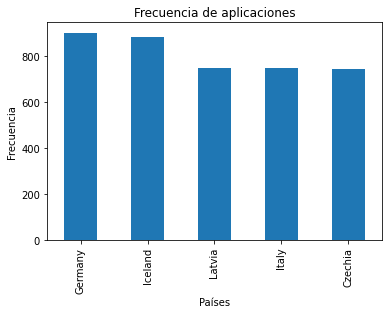

In [107]:

frec_pais_orden.head()['date'].plot(kind='bar',title='Frecuencia de aplicaciones', 
                                   xlabel="Países", ylabel="Frecuencia" ) 





Países con menos aplicaciones en fechas diferentes

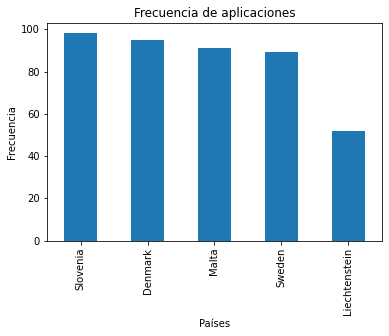

In [108]:
frec_pais_orden.tail()['date'].plot(kind='bar',title='Frecuencia de aplicaciones', 
                                   xlabel="Países", ylabel="Frecuencia" )

## Frecuencia de aplicaciones por fabricante

2. ¿Cuál fabricante de vacunas ha tenido mas aplicaciones a lo largo del 
tiempo?, contar count() los registros ¿será Pfizer/BioNTech?


Se crea un conjunto de datos de la frecudncia de vacunas por fabricante.

In [109]:
frec_fabr= covid.groupby(['vaccine']).count() 
print(frec_fabr)

                    location  date  total_vaccinations
vaccine                                               
CanSino                   64    64                  64
Johnson&Johnson         1658  1658                1658
Moderna                 2765  2765                2765
Oxford/AstraZeneca      2345  2345                2345
Pfizer/BioNTech         3556  3556                3556
Sinopharm/Beijing         25    25                  25
Sinovac                  513   513                 513
Sputnik V                 39    39                  39


## Ordenando frecuencias

Se ordena la tabla de frecuencia de mayor a menor.

In [110]:
frec_fabr_orden = frec_fabr.sort_values('total_vaccinations', ascending = False)
print(frec_fabr_orden)

                    location  date  total_vaccinations
vaccine                                               
Pfizer/BioNTech         3556  3556                3556
Moderna                 2765  2765                2765
Oxford/AstraZeneca      2345  2345                2345
Johnson&Johnson         1658  1658                1658
Sinovac                  513   513                 513
CanSino                   64    64                  64
Sputnik V                 39    39                  39
Sinopharm/Beijing         25    25                  25


### Visualización de frecuencias

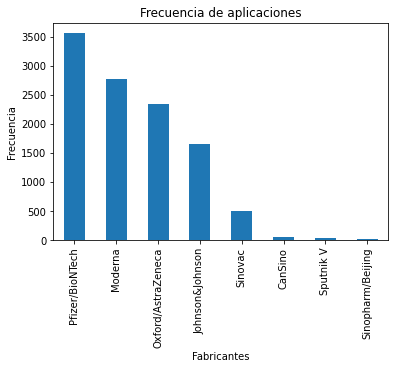

In [111]:
frec_fabr_orden['date'].plot(kind='bar',title='Frecuencia de aplicaciones', 
                                   xlabel="Fabricantes", ylabel="Frecuencia" ) 


La vacuna Pfizer/BioNTech se ha aplica en 3556 ocasiones siendo la mayor de entre todos los fabricants y la vacuna Sputnik V es la menor con 39 en cantidad de ocasiones aplicadas de entre todas ellas.


## Suma de aplicaciones de vacunas por país

3. ¿Cuántas vacunas se han aplicado por país?, sumar (total_vaccinations) la cantidad de aplicaciones por país?

Se utiliza la función *sum()* por la variable *total_vaccinations* agrupadas por país con la variable *location*



In [112]:
pais_sum= covid.groupby(['location']).sum('total_vaccinations') 
print(pais_sum)

               total_vaccinations
location                         
Austria                 118511334
Belgium                 162354528
Bulgaria                 27931197
Chile                  2629159998
Croatia                  38864087
Cyprus                   12211016
Czechia                 840566515
Denmark                  75191003
Estonia                  15626971
Finland                  68408812
France                 5540732366
Germany                7657809082
Hong Kong               382021660
Hungary                 164704986
Iceland                  38744648
Ireland                  52553510
Italy                  5418168374
Japan                  3910422920
Latvia                  111034630
Liechtenstein              451823
Lithuania               240077306
Luxembourg                7664316
Malta                     9976920
Netherlands             234720727
Poland                  438336578
Portugal                145482899
Romania                1037741287
Slovakia      

## Ordenando datos



In [113]:
pais_sum_orden = pais_sum.sort_values('total_vaccinations', ascending = False)
print(pais_sum_orden)

               total_vaccinations
location                         
United States         41524152779
Germany                7657809082
France                 5540732366
Italy                  5418168374
Japan                  3910422920
Chile                  2629159998
Romania                1037741287
Czechia                 840566515
Switzerland             736032309
Spain                   651194863
Poland                  438336578
Uruguay                 397732230
Hong Kong               382021660
Lithuania               240077306
Netherlands             234720727
Hungary                 164704986
Belgium                 162354528
Portugal                145482899
Sweden                  128990325
Austria                 118511334
Latvia                  111034630
Denmark                  75191003
Finland                  68408812
Slovakia                 56050405
Ireland                  52553510
Croatia                  38864087
Iceland                  38744648
Bulgaria      

### Visualizando datos

Se visualizan las suma de vacunados por pais, primero los mayores y la segunda visualzia los menores en cantidad de vacunados.



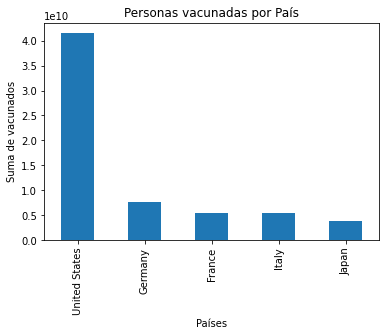

In [114]:
pais_sum_orden.head()['total_vaccinations'].plot(kind='bar',title='Personas vacunadas por País', 
                                   xlabel="Países", ylabel="Suma de vacunados" ) 


Estados Unidos es el páis que más personas vacunadas tiene una suma mayor a los de 41,524 (millones de personas) seguido de Alemania con 7,657 (millones de personas) aproximadamente.

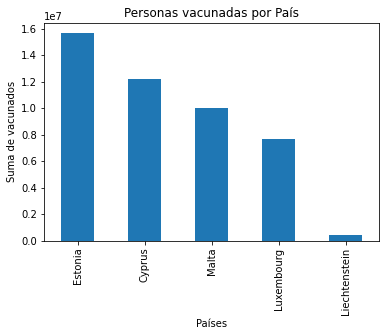

In [115]:
pais_sum_orden.tail()['total_vaccinations'].plot(kind='bar',title='Personas vacunadas por País', 
                                   xlabel="Países", ylabel="Suma de vacunados" )

Los países que menos personas han vacunado son Luxembourg por encima de 7 millones de personas y Liechtenstein por debajo de las quinientas mil personas con valor de 451823 vacunas.

## Suma de aplicaciones de vacunas por fabricante

4. ¿Cuántas vacunas se han aplicado por fabricante?, sumar (total_vaccinations) las vacunas agrupadas por fabricante

In [116]:
fabr_sum= covid.groupby(['vaccine']).sum('total_vaccinations') 
print(fabr_sum)

                    total_vaccinations
vaccine                               
CanSino                       22498727
Johnson&Johnson             1748108075
Moderna                    20286391475
Oxford/AstraZeneca          3631156763
Pfizer/BioNTech            44569701150
Sinopharm/Beijing             34668398
Sinovac                     2572589889
Sputnik V                     29611165


## Visualización de datos



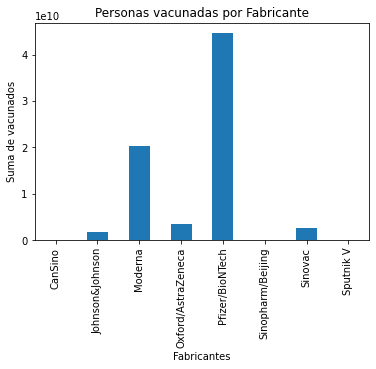

In [117]:
fabr_sum['total_vaccinations'].plot(kind='bar',title='Personas vacunadas por Fabricante', 
                                   xlabel="Fabricantes", ylabel="Suma de vacunados" ) 

La vacuna del fabricante Pfizer/BioNTech es la vacuna que más se ha aplicado a nivel mundial con una suma de 44,569,701,150 (por encima de los 44,569 millones de aplicaciones).

## Suma de aplicaciones por meses

Se agrupan los datos por meses sumando la variable .

Antes de utilizar funciones de fecha se identifica el tipo de datos date siendo este una serie de valores de tipo fecha o date.

Luego convertir a tipo datetime la variable date del data frame covid para poder utilizar funciones de agregados con fechas.

In [118]:
import datetime as dt

print(type(covid['date']))

# df['date'] = pd.to_datetime(date)
covid['date'] = pd.to_datetime(covid['date'])




<class 'pandas.core.series.Series'>


Agrupar por fecha



In [119]:

mes_sum = covid.groupby(covid['date'].dt.month).sum('total_vaccinations')
print(mes_sum)


      total_vaccinations
date                    
1              452121623
2             1883457386
3             4765802019
4             8608005615
5            12963339621
6            17070467058
7            21745775771
8             5404963283
12                793266


## Visualización de datos

El mes que más vacunas se han aplicado a nivel mundial es mes de Julio (mes 7) con una suma exacta de 21,745,775,771 dosis aplicadas aproximadamente mas de 21,000 millones de aplicaciones.

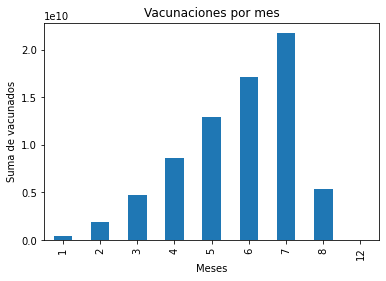

In [120]:
mes_sum['total_vaccinations'].plot(kind='bar',title='Vacunaciones por mes', 
                                   xlabel="Meses", ylabel="Suma de vacunados" )